In [1]:
#090200158 Elif Dila Türkmenoğlu
#090200107 Tunahan Akgül
#090200148 Melik Kaan Şelale
#Group Nickname: Powerpuff Girls

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
import pandas as pd

In [4]:
class SGD:
    
    def __init__(self, lr=0.01, max_iter=1000, batch_size=10, tol=1e-3,theta=None):
        """
        Initializes the SGD optimizer.

        Parameters:
        - lr: Learning rate.
        - max_iter: Maximum number of iterations.
        - batch_size: Size of the mini-batch used in each iteration.
        - tol: Tolerance for convergence.
        - theta: Initial values for optimization.
        
        """
        self.learning_rate = lr
        self.max_iteration = max_iter
        self.batch_size = batch_size
        self.tolerance_convergence = tol
        self.theta = np.array(theta)

    def update_points(self, x1,y1,xval, yval):
        
        """
        Update the points using Stochastic Gradient Descent.

        Parameters:
        - x1, y1: Initial coordinates for optimization.
        - xval, yval: Data points for optimization.

        Returns:
        - Optimized coordinates.
        
        """
        for _ in range(self.max_iteration): 
            indices = np.random.permutation(len(xval))
            x_batch = xval[indices]
            y_batch = yval[indices]
            
            for i in range(0, len(xval)-1, self.batch_size):
                xbatc = x_batch[i:i + self.batch_size]
                ybatc = y_batch[i:i + self.batch_size]
                x1, y1 = self.gradient(x1, y1, xbatc, ybatc)
               
            grad_x = np.mean(rgi_x((x1, yval)))
            grad_y = np.mean(rgi_y((xval, y1)))

            if np.linalg.norm([grad_x, grad_y]) < self.tolerance_convergence:
                break 
            
            
        self.theta = np.array([x1,y1])
        return self.theta
    
    def gradient(self, x1, y1,xbatch,ybatch):
        """
        Calculates the gradient and updates the coordinates.

        Parameters:
        - x1, y1: Current coordinates.
        - xbatch, ybatch: Mini-batch coordinates.

        Returns:
        - Updated coordinates.
        
        """
        x_grad = np.mean(rgi_x((x1,ybatch)))
        y_grad = np.mean(rgi_y((xbatch,y1)))
        
        x1 = x1 - self.learning_rate*x_grad
        y1 = y1 - self.learning_rate*y_grad
        
        return x1,y1

In [5]:
# Definition of the cost function
def cost_function(x, y):
    term1 = 1.8 - np.exp(-0.1 * (2.5 * (x + 3)**2 + (y + 3)**2))
    term2 = -1.5 * np.exp(-0.05 * (2.5 * (x - 3)**2 + (y - 3)**2))
    return term1 + term2

# Create a 2D grid
x_values = np.arange(-8, 8.1, 0.1)
y_values = np.arange(-8, 8.1, 0.1)
X_grid, Y_grid = np.meshgrid(x_values, y_values)
grid = np.array(np.meshgrid(x_values, y_values)).T.reshape(-1,2)
values = cost_function(grid[:,0],grid[:,1])
interpolator = RegularGridInterpolator((x_values,y_values),values.reshape(161,161))

# Calculate the gradient on the grid
Z = cost_function(X_grid,Y_grid)
grad=np.gradient(Z)
rgi_x = RegularGridInterpolator((x_values, y_values), grad[0])
rgi_y = RegularGridInterpolator((x_values, y_values), grad[1])

# Calculate the cost values on the grid
Z_grid = interpolator((X_grid,Y_grid)) 

# Initial points for optimization
initial_points = [np.random.uniform(low=0,high=8,size=2),np.random.uniform(low=0,high=8,size=2),np.random.uniform(low=0,high=8,size=2)]

                                            x         y         z
Initial Values for iteration (1) =   3.444477  1.243285  0.546307
Final Values for iteration (1) =     2.825731  2.999255  0.306038
Initial Values for iteration (2) =   4.046018  3.391518  0.502073
Final Values for iteration (2) =     2.825790  2.999255  0.306035
Initial Values for iteration (3) =   3.746731  5.502868  0.777476
Final Values for iteration (3) =     2.826349  2.999259  0.306004


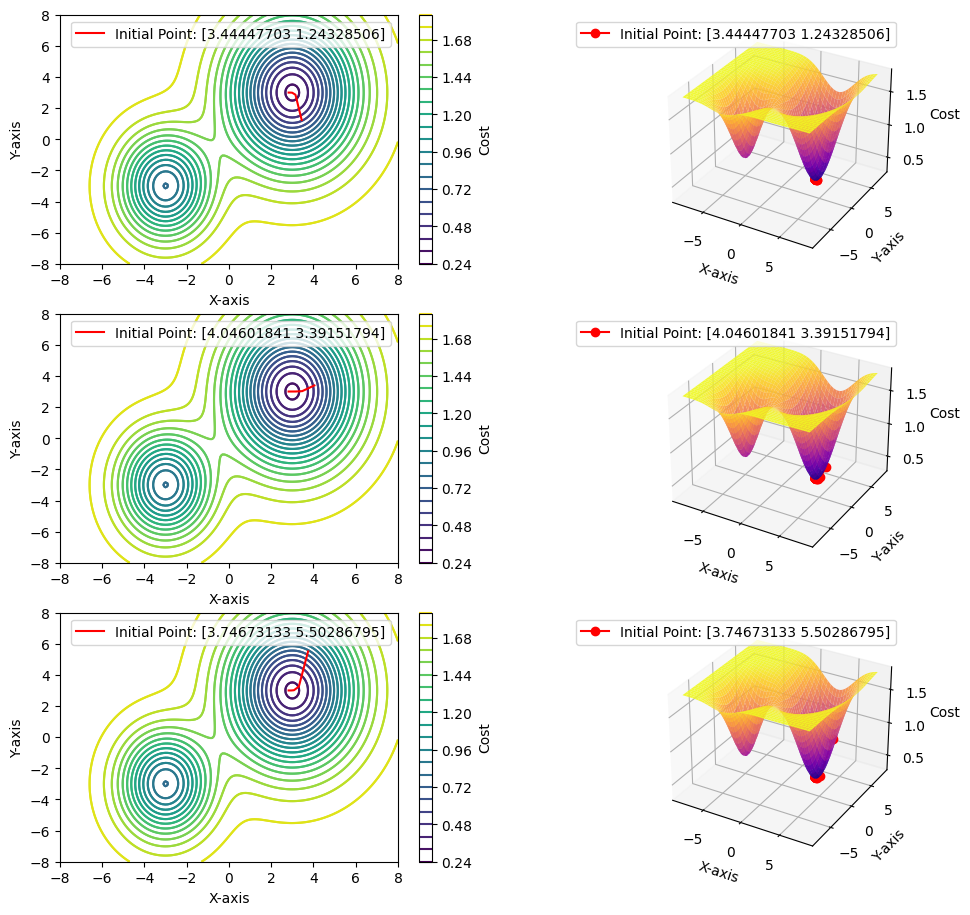

In [6]:
# Plotting setup
fig = plt.figure(figsize=(12,11))
df = pd.DataFrame(columns=['x', 'y', 'z'])
i=-1

# Loop over initial points
for initial_point in initial_points:
    i+=1
    
    # Create and update the SGD model
    model = SGD(lr=0.1, max_iter=100, batch_size=10, tol=1e-4,theta=initial_point)
    model.theta = initial_point
    
    # Initialize arrays to store trajectory
    trajectory_x = np.zeros(model.max_iteration)
    trajectory_x[0] = model.theta[0]
    trajectory_y = np.zeros(model.max_iteration)
    trajectory_y[0] = model.theta[1]
    trajectory_z = np.zeros(model.max_iteration)
    trajectory_z[0] = interpolator((model.theta[0], model.theta[1]))
    
    # Store initial values in DataFrame
    init_point = (trajectory_x[0],trajectory_y[0])
    df.loc[f'Initial Values for iteration ({i + 1}) = '] = [trajectory_x[0], trajectory_y[0], f'{interpolator(init_point):.6f}']
    
    # Perform SGD optimization
    for k in range(model.max_iteration-1):
        
        model.theta = model.update_points(model.theta[0], model.theta[1],x_values,y_values)
        
        trajectory_x[k+1] = model.theta[0]

        trajectory_y[k+1] = model.theta[1]
        
        trajectory_z[k+1] = interpolator((model.theta[0], model.theta[1]))
        
    # Plotting trajectories
    for j in range(2):
            
        if j == 1:
            ax = fig.add_subplot(3, 2, i * 2 + j + 1, projection='3d')
            ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='plasma', alpha=0.9)
            ax.set_xlabel('X-axis')
            ax.set_ylabel('Y-axis')
            ax.set_zlabel('Cost')
            ax.plot(trajectory_x, trajectory_y, trajectory_z, marker="o",label=f'Initial Point: {initial_point}',color="r")
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys())
            
        else:
            ax = fig.add_subplot(3, 2, i * 2 + j + 1)
            contour = ax.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')
            ax.set_xlabel('X-axis')
            ax.set_ylabel('Y-axis')
            plt.colorbar(contour,label="Cost")
            plt.contour(X_grid, Y_grid, Z_grid, levels=20, cmap='viridis')
            ax.plot(trajectory_x, trajectory_y, label=f'Initial Point: {initial_point}',color="r")
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys())
      
    
    final_point = (trajectory_x[-1],trajectory_y[-1])
    df.loc[f'Final Values for iteration ({i + 1}) = '] = [final_point[0], final_point[1], f'{interpolator(final_point):.6f}']  

print(df)
plt.show()